INFO 4248 TP **RMSProp**


---



LISTE DES ETUDIANTS
- GUIFFO WAFFO PATERNE 20V2904
- MONGOUE MFOUT ASSANA COCO 18T2426
- MONGUE NZIE OUSSENA MIGNON 18T2424
- OWONA FOUDA JEAN EDOUARD 13H2643
***
 Sous la supervision de DR MELATAGIA PAULIN

## Introduction 

La descente du gradient est un algorithme d'optimisation qui suit le gradient négatif d'une fonction objectif à la recherche de son minimum. Une limitation d'une telle approche est qu'elle utilise la même taille de pas pour chaque variable d'entrée, ce qui produit des oscillations. Une solution proposée pour palier à ce problème est ***Root Mean Square Propagation*** (RMSprop), il s'agit d'un algorithme d'optimisation conçu pour les réseaux de neurones, proposé pour la première fois par  **Geoff Hinton**  dans la conférence 6 du cours en ligne "Neural Networks for Machine Learning". La motivation est que la **l'amplidute** (taux maximal de changement du gradient en un point) des gradients peut différer pour différents poids et peut changer pendant l'apprentissage, ce qui rend difficile le choix d'un taux d'apprentissage global unique. ***RMSprop*** fournit une solution pour résoudre ce problème. Le but de cet exposé est de présenter l'intuition et les éléments de mathématique derrière cet algorithme.

## Intuition derrière l'algorithme 
Le choix du pas dans la methode de descente de gradient est crucial dans la messure ou il est necessaire pour assurer la converge. dans la methode de descente classique les pas est fixe ce qui peux entrainer:


*   une convergence lente si le pas est petit
*   une divergence ou oscillation si le pas est grand

AdaGrad est venu corriger ce problème avec un pas adaptatif à chaque iteration. 
$ w_t = w_{t-1} / (1e-8+ \sqrt s ) $  avec
s: la somme des gradient partiel. \\
RMSprop est un moyen d'accélérer le processus d'apprentissage en pénalisant la mise à jour de ces paramètres de réseau de neurones qui font trop osciller l'estimation de la fonction de coût notée ***$ J $***.
L'idée est la suivante : s'il y a un paramètre dans le réseau de neurones qui fait beaucoup osciller l'estimation de la fonction de coût ***$ J $***, on veut pénaliser la mise à jour de ce paramètre lors de l'optimisation, donc pour éviter que l'algorithme de descente de gradient s'adapte trop vite à changements de ce paramètre, par rapport aux autres.
Le fait que le paramètre en question fasse beaucoup osciller **$ J $** est un indicateur que la dérivée de ***$ J $*** par rapport à ce paramètre est beaucoup plus grande que les dérivées pour le reste des paramètres. Par conséquent, le facteur de normalisation appliqué dans RMSprop à la mise à jour de ce paramètre (c'est-à-dire sa racine carrée moyenne) sera plus grand par rapport au reste des paramètres, et le résultat de la normalisation (et de la mise à jour) plus petit.


## Eléments de mathématiques utilisés

Pour mieux parler de RMSpro.Il convient de présenter la méthode **Adaptative gradient(Adagrad)** avant de présenter RMSprop car il en est un amélioration.
Les poids sont calculés dans le réseaux de neurones à l'aide de la descente classique du gradient sont calculés en utlisant la formule : 
$ w_t = w_{t-1} - \eta(\frac{\partial J}{\partial w})_{t-1} (1)$ cependant il faut trouver un moyen de rendre le pas petit lorsqu'on approche le minimum global et grand lorsque nous en sommes éloignés, on d'ou la méthode Adagrad la méthode, 
Cette méthode utilise un pas adaptatif vérifiant la formule
$ \eta_t = \frac{\eta_{t-1}}{\sqrt{\alpha_t + \epsilon}} (2) $, avec $ \alpha_t = \sum_{i=1}^{t} ({\frac{\partial J}{\partial w_i}})^2 (3) $
Cette somme peut-être interprétée comme la somme des carrés des gradients précédents.
Ainsi les poids du réseau de neurones en $ 1 $ sont calculés en tenant compte de ce paramètre $ \alpha_t $ d'où le caractère adaptatif. Le paramètre $ \epsilon $ permet d'empêcher qu'on ait une valeur nulle du dénominateur au cas où  $ \alpha_t $ prendrait à l'instant $ t $ une valeur proche de ou égale à $ 0 $.
Le principal avantage de cette façon de faire est que la somme de tous les gradients permet de dire à and vitesse et dans quelle direction nous devons poursuivre la recherche. Cependant il est possible qu'à un instant $ t $ donné $ \alpha_t $ prenne une grande valeur, ce qui aurait pour effet de fournir un taux $ \eta_t $ faible et par conséquent le pas aussi, on obtiendrait ainsi sensiblement à l'instant $ t $ une valeur similaire à celle du poids de l'instant $ t -1 $, ce qui n'est plus **optimal**.
RMSprop permet de résoudre le problème sus-évoqué:
avec cette méthode, $ \eta $ est calculé en utilisant la formule $ \eta_t = \frac{\eta_{t-1}}{\sqrt{w_{arg}(t) + \epsilon}} (4) $, avec $ w_{arg}(t) = \alpha * w_{arg}(t-1) + (1-\alpha)*\sum_{i=1}^{t} ({\frac{\partial J}{\partial w}})^2 (5)$
Le premier terme de la somme permet d'affecter une pondération faible aux dérivées précédentes, tandis que le second terme permet d'affecter une pondération élevée aux dérivées suivantes.


## Proposition d'implémentation

Nous allons implémenter RMSprop avec la fonction suivante : $ f(x,y) = \frac{1}{2}*x^2 + \frac{7}{2}*y^2$ 

/tmp/ipykernel_46120/297908994.py:24: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


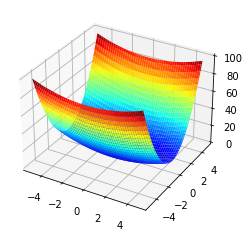

In [1]:
from math import sqrt
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
from numpy import asarray
from numpy.random import seed

# la fonction objective
def f(x,y):
    return (0.5*x**2) + (3.5*y**2)

# Build a 3D representation of our function
# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = f(x, y)
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()

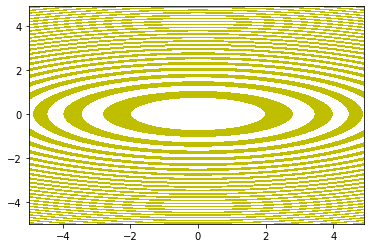

In [2]:
# Build a contour representation of our function

# define range for input
bounds = asarray([[-5.0, 5.0], [-5.0, 5.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = f(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, colors = ('w','y'))
# show the plot
pyplot.show()

In [3]:
# defining the derivate of f
def df(x,y):
    return asarray([x, 7*y])

In [6]:
# Assume that our starting point is
x_0 = [7,1.5]

# Define the RMSprop function
# gradient descent algorithm with rmsprop
def rmsprop(f, df, bounds, n_iter, step_size, rho,x_0,epsilon=1e-4):
    # List of all solution, for the plot
    solutions = list()
    # the starting point
    solution = asarray([x_0[0],x_0[1]])
    # list of the average square gradients for each variable
    sq_grad_avg = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent
    solution_eval = 100
    # run the gradient descent
    it = 1
    while solution_eval > epsilon and it< n_iter:
        # calculate gradient
        gradient = df(solution[0], solution[1])
        # update the average of the squared partial derivatives
        for i in range(gradient.shape[0]):
            # calculate the squared gradient
            sg = gradient[i]**2.0
            # update the moving average of the squared gradient
            sq_grad_avg[i] = (sq_grad_avg[i] * rho) + (sg * (1.0-rho))
        # build a solution one variable at a time
        new_solution = list()
        for i in range(solution.shape[0]):
            # calculate the step size for this variable
            alpha = step_size / (1e-8 + sqrt(sq_grad_avg[i]))
            # calculate the new position in this variable
            value = solution[i] - alpha * gradient[i]
            # store this variable
            new_solution.append(value)
            
        # store the new solution
        solution = asarray(new_solution)
        solutions.append(solution)
        # evaluate candidate point
        solution = asarray(new_solution)
        solution_eval = f(solution[0], solution[1])
        # print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
        it +=1
    return solutions


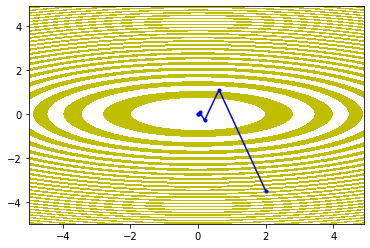

In [11]:
seed(1)
bounds = asarray([[-5.0, 5.0], [-5.0, 5.0]])
x_0 = [7,1.5]
n_iter = 1000
# define the step size
step_size = 0.5
# momentum for rmsprop
rho = 0.99
solutions = rmsprop(f, df, bounds, n_iter, step_size, rho, x_0)
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
x, y = meshgrid(xaxis, yaxis)
results = f(x,y)
pyplot.contourf(x,y, results, levels = 50, colors = ('w','y'))
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='b')
pyplot.show()

In [12]:
len(solutions)

7

In [ ]:
def norme(x):
    b= [a**2.0 for a in x]
    return sqrt(sum(b))

def xk_pas_fixe(s,x,y):
    g=df(x,y)
    return np.add(x,-1*s*g)

def gradientPasConstant(x,y,pas,tol=1e-5,Niter=1000):
    compteur = 1
    # initialiser le tableau
    na = np.zeros((0,6))
    g = df(x,y)
    while compteur < Niter and norme(g)>tol:
        # ajouter les different elements
        na =np.concatenate((na,np.array([[compteur,x[0],x[1],norme(g),pas,f(x)]])),axis=0)
        x = xk_pas_fixe(pas,x)
        g = df(x,y)
        compteur +=1
    return [compteur,na]